# 1. Build a Transfer Learning image classification model using the VGG16 & VGG19 (pre-trained network).

# VGG16

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras import layers
from keras import models
from keras import optimizers
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
import seaborn as sns

In [2]:
# Constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

In [3]:
# Paths
train_path = 'C:/Users/Ramesh/Downloads/set/training_set/'
test_path = 'C:/Users/Ramesh/Downloads/set/test_set/'

In [4]:
# Use ImageDataGenerator for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

Found 2564 images belonging to 1 classes.
Found 641 images belonging to 1 classes.


In [5]:
# Get the class names from the subdirectories
class_names = sorted(train_generator.class_indices.keys())

# Print the class names
print("Class Names:", class_names)

Class Names: ['training_set']


In [6]:
# Use ImageDataGenerator for testing
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 1005 images belonging to 1 classes.


In [7]:
# Create the VGG16 model
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model_vgg16 = models.Sequential()
model_vgg16.add(base_model_vgg16)
model_vgg16.add(layers.Flatten())
model_vgg16.add(layers.Dense(256, activation='relu'))
model_vgg16.add(layers.Dropout(0.5))
model_vgg16.add(layers.Dense(1, activation='sigmoid'))

In [8]:
# Freeze the pre-trained layers
for layer in base_model_vgg16.layers:
    layer.trainable = False

In [9]:
model_vgg16.compile(optimizer=optimizers.RMSprop(lr=1e-4),
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

In [10]:
# Print the model summary
model_vgg16.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 21137729 (80.63 MB)
Trainable params: 6423041 (24.50 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [11]:
# Define callbacks (ModelCheckpoint and LearningRateScheduler)
checkpoint = ModelCheckpoint('best_model_vgg16.h5', monitor='val_accuracy', save_best_only=True)

In [12]:
# Train the model
history_vgg16 = model_vgg16.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    callbacks=[checkpoint]
)

Epoch 1/10



80/80 [==============================] - 295s 4s/step - loss: 0.0091 - accuracy: 0.9933 - val_loss: 3.5108e-32 - val_accuracy: 1.0000


C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/10
80/80 [==============================] - 294s 4s/step - loss: 2.1720e-28 - accuracy: 1.0000 - val_loss: 1.4794e-32 - val_accuracy: 1.0000
Epoch 3/10
80/80 [==============================] - 303s 4s/step - loss: 5.6935e-25 - accuracy: 1.0000 - val_loss: 1.4119e-30 - val_accuracy: 1.0000
Epoch 4/10
80/80 [==============================] - 300s 4s/step - loss: 1.9192e-29 - accuracy: 1.0000 - val_loss: 1.3072e-31 - val_accuracy: 1.0000
Epoch 5/10
80/80 [==============================] - 312s 4s/step - loss: 5.9965e-30 - accuracy: 1.0000 - val_loss: 3.0362e-33 - val_accuracy: 1.0000
Epoch 6/10
80/80 [==============================] - 305s 4s/step - loss: 1.3715e-28 - accuracy: 1.0000 - val_loss: 1.2431e-31 - val_accuracy: 1.0000
Epoch 7/10
80/80 [==============================] - 343s 4s/step - loss: 4.8739e-28 - accuracy: 1.0000 - val_loss: 1.4604e-33 - val_accuracy: 1.0000
Epoch 8/10
80/80 [==============================] - 457s 6s/step - loss: 7.5722e-28 - accuracy: 1.0000 - v

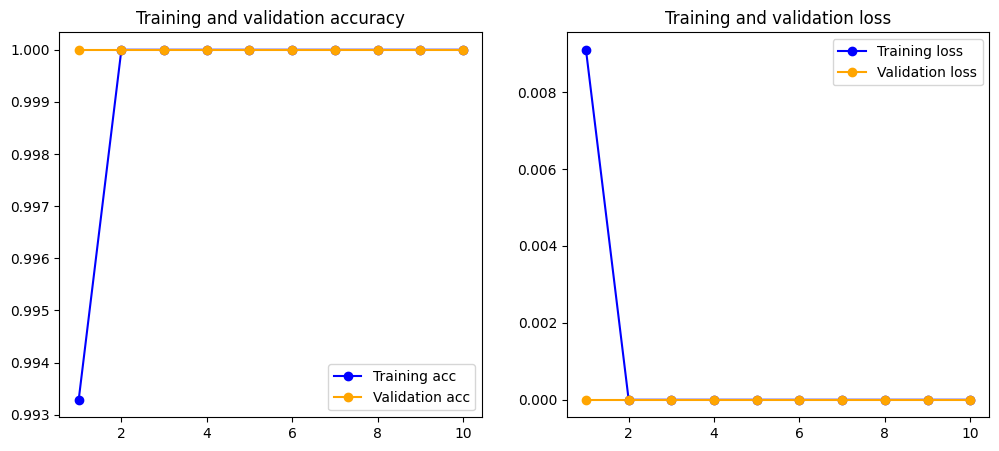

In [73]:
# Plot the training and validation accuracy and loss
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'o-', label='Training acc', color='blue')  # Blue solid line
    plt.plot(epochs, val_acc, 'o-', label='Validation acc', color='orange')  # Orange solid line
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'o-', label='Training loss', color='blue')  # Blue solid line
    plt.plot(epochs, val_loss, 'o-', label='Validation loss', color='orange')  # Orange solid line
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

plot_history(history_vgg16)

In [14]:
# Evaluate on the test set
test_loss, test_acc = model_vgg16.evaluate(test_generator)
print(f'Test Accuracy: {test_acc * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')

32/32 [==============================] - 144s 4s/step - loss: 6.1191e-27 - accuracy: 1.0000
Test Accuracy: 100.00%
Test Loss: 0.0000


In [15]:
# Predict the classes for the test set
y_test_pred = model_vgg16.predict(test_generator)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)  # Adjust for multiclass classification

# Get the true labels
y_test_true = test_generator.classes

# Calculate confusion matrix and classification report
conf_matrix_test = confusion_matrix(y_test_true, y_test_pred_classes)
class_report_test = classification_report(y_test_true, y_test_pred_classes)

print("Confusion Matrix (Test):\n", conf_matrix_test)
print("\nClassification Report (Test):\n", class_report_test)

32/32 [==============================] - 99s 3s/step
Confusion Matrix (Test):
 [[1005]]

Classification Report (Test):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1005

    accuracy                           1.00      1005
   macro avg       1.00      1.00      1.00      1005
weighted avg       1.00      1.00      1.00      1005



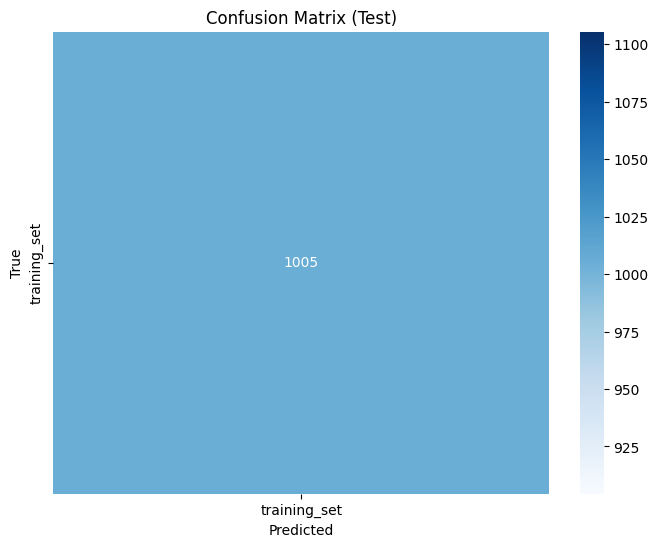

In [16]:
# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (Test)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# VGG19

In [18]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG19
from keras import layers
from keras import models
from keras import optimizers
from keras.callbacks import ModelCheckpoint
import seaborn as sns

In [19]:
# Constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

In [20]:
# Paths
train_path = 'C:/Users/Ramesh/Downloads/set/training_set/'
test_path = 'C:/Users/Ramesh/Downloads/set/test_set/'

In [21]:
# Use ImageDataGenerator for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

Found 2564 images belonging to 1 classes.
Found 641 images belonging to 1 classes.


In [22]:
# Get the class names from the subdirectories
class_names = sorted(train_generator.class_indices.keys())

# Print the class names
print("Class Names:", class_names)

Class Names: ['training_set']


In [23]:
# Use ImageDataGenerator for testing
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 1005 images belonging to 1 classes.


In [24]:
# Create the VGG19 model  # Change here
base_model_vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))  # Change here

model_vgg19 = models.Sequential()
model_vgg19.add(base_model_vgg19)
model_vgg19.add(layers.Flatten())
model_vgg19.add(layers.Dense(256, activation='relu'))
model_vgg19.add(layers.Dropout(0.5))
model_vgg19.add(layers.Dense(1, activation='sigmoid'))

80134624/80134624 [==============================] - 33s 0us/step


In [25]:
# Freeze the pre-trained layers
for layer in base_model_vgg19.layers:
    layer.trainable = False

In [26]:
model_vgg19.compile(optimizer=optimizers.RMSprop(lr=1e-4),
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

In [27]:
# Print the model summary
model_vgg19.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               6422784   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 26447425 (100.89 MB)
Trainable params: 6423041 (24.50 MB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [28]:
# Define callbacks (ModelCheckpoint)
checkpoint = ModelCheckpoint('best_model_vgg19.h5', monitor='val_accuracy', save_best_only=True)

In [29]:
# Train the model
history_vgg19 = model_vgg19.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    callbacks=[checkpoint]
)

Epoch 1/10
80/80 [==============================] - 394s 5s/step - loss: 0.0183 - accuracy: 0.9901 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10


C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


80/80 [==============================] - 381s 5s/step - loss: 2.0957e-29 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
80/80 [==============================] - 406s 5s/step - loss: 1.0389e-30 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
80/80 [==============================] - 510s 6s/step - loss: 3.0898e-32 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
80/80 [==============================] - 484s 6s/step - loss: 3.8011e-27 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
80/80 [==============================] - 463s 6s/step - loss: 2.3390e-27 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
80/80 [==============================] - 394s 5s/step - loss: 4.4851e-31 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 8/10
80/80 [==============================] - 370s 5s/step - loss: 3.3239e-31 - accuracy: 1.0000 - val_loss: 0.

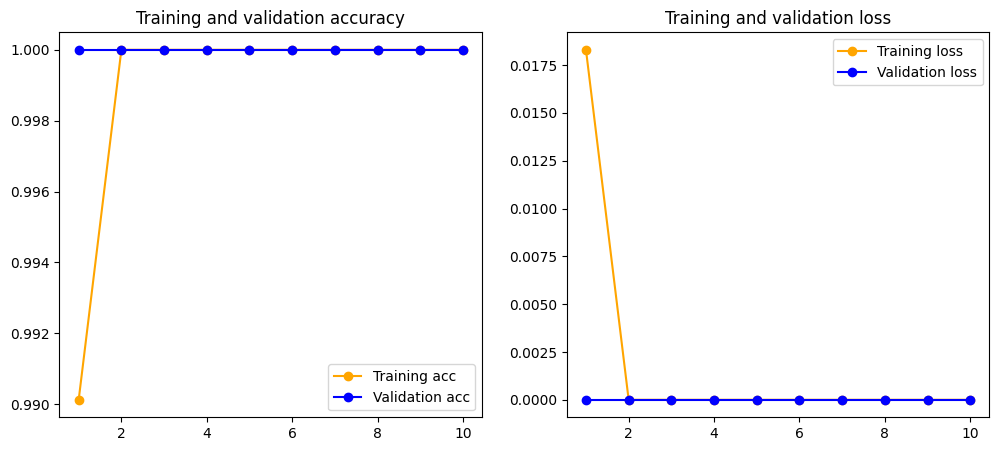

In [38]:
# Plot the training and validation accuracy and loss
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'o-', label='Training acc', color='orange')
    plt.plot(epochs, val_acc, 'o-', label='Validation acc', color='blue')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'o-', label='Training loss', color='orange')
    plt.plot(epochs, val_loss, 'o-', label='Validation loss', color='blue')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

plot_history(history_vgg19)

In [39]:
# Evaluate on the test set
test_loss, test_acc = model_vgg19.evaluate(test_generator)
print(f'Test Accuracy: {test_acc * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')

32/32 [==============================] - 113s 4s/step - loss: 2.6458e-33 - accuracy: 1.0000
Test Accuracy: 100.00%
Test Loss: 0.0000


In [40]:
# Predict the classes for the test set
y_test_pred = model_vgg19.predict(test_generator)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)  # Adjust for multiclass classification

# Get the true labels
y_test_true = test_generator.classes

# Calculate confusion matrix and classification report
conf_matrix_test = confusion_matrix(y_test_true, y_test_pred_classes)
class_report_test = classification_report(y_test_true, y_test_pred_classes)

print("Confusion Matrix (Test):\n", conf_matrix_test)
print("\nClassification Report (Test):\n", class_report_test)

32/32 [==============================] - 113s 4s/step
Confusion Matrix (Test):
 [[1005]]

Classification Report (Test):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1005

    accuracy                           1.00      1005
   macro avg       1.00      1.00      1.00      1005
weighted avg       1.00      1.00      1.00      1005



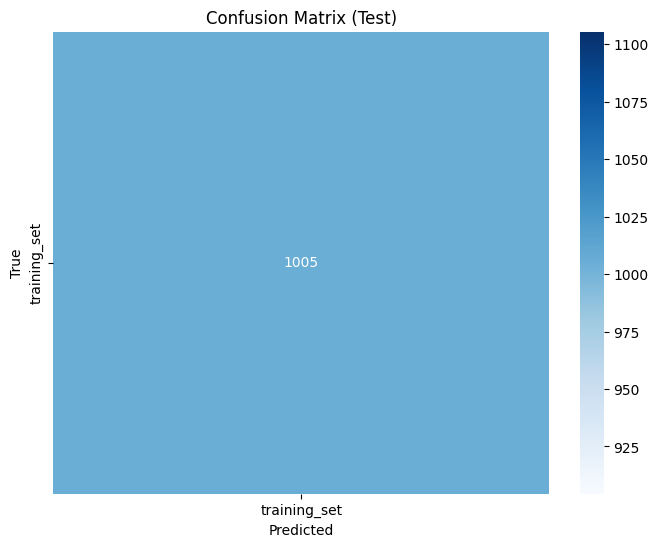

In [41]:
# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (Test)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 2. Build a Multiclass image classification model with InceptionV3 and Mobilenet pretrained network.

# InceptionV3

In [42]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import InceptionV3
from keras import layers
from keras import models
from keras import optimizers
from keras.callbacks import ModelCheckpoint
import seaborn as sns

In [43]:
# Constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 2  # Change this to the number of classes in your dataset

In [44]:
# Paths
train_path = 'C:/Users/Ramesh/Downloads/set/training_set/'
test_path = 'C:/Users/Ramesh/Downloads/set/test_set/'

In [45]:
# Use ImageDataGenerator for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # Use 'categorical' for multiclass classification
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 2564 images belonging to 1 classes.
Found 641 images belonging to 1 classes.


In [46]:
# Get the class names from the subdirectories
class_names = sorted(train_generator.class_indices.keys())

# Print the class names
print("Class Names:", class_names)

Class Names: ['training_set']


In [47]:
# Use ImageDataGenerator for testing
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 1005 images belonging to 1 classes.


In [48]:
# Create the InceptionV3 model
base_model_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model_inception = models.Sequential()
model_inception.add(base_model_inception)
model_inception.add(layers.GlobalAveragePooling2D())
model_inception.add(layers.Dense(256, activation='relu'))
model_inception.add(layers.Dropout(0.5))
model_inception.add(layers.Dense(NUM_CLASSES, activation='softmax'))

In [49]:
# Freeze the pre-trained layers
for layer in base_model_inception.layers:
    layer.trainable = False

In [50]:
model_inception.compile(optimizer=optimizers.RMSprop(lr=1e-4),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

In [51]:
# Print the model summary
model_inception.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_4 (Dense)             (None, 256)               524544    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 2)                 514       
                                                                 
Total params: 22327842 (85.17 MB)
Trainable params: 525058 (2.00 MB)
Non-trainable params: 21802784 (83.17 MB)
_________

In [52]:
# Define callbacks (ModelCheckpoint)
checkpoint = ModelCheckpoint('best_model_inception.h5', monitor='val_accuracy', save_best_only=True)

In [53]:
# Train the model
history_inception = model_inception.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    callbacks=[checkpoint]
)

Epoch 1/10
80/80 [==============================] - ETA: 0s - loss: 35.6714 - accuracy: 0.4487

C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


80/80 [==============================] - 85s 1s/step - loss: 35.6714 - accuracy: 0.4487 - val_loss: 10.0682 - val_accuracy: 0.0000e+00
Epoch 2/10
80/80 [==============================] - 79s 981ms/step - loss: 114.4516 - accuracy: 0.4447 - val_loss: 52.0760 - val_accuracy: 0.0000e+00
Epoch 3/10
80/80 [==============================] - 78s 974ms/step - loss: 192.6168 - accuracy: 0.4479 - val_loss: 19.7149 - val_accuracy: 0.0000e+00
Epoch 4/10
80/80 [==============================] - 78s 971ms/step - loss: 276.0776 - accuracy: 0.4775 - val_loss: 9.3375 - val_accuracy: 0.0000e+00
Epoch 5/10
80/80 [==============================] - 78s 974ms/step - loss: 350.2349 - accuracy: 0.4885 - val_loss: 13.6778 - val_accuracy: 0.0000e+00
Epoch 6/10
80/80 [==============================] - 79s 983ms/step - loss: 430.2604 - accuracy: 0.5000 - val_loss: 33.2945 - val_accuracy: 0.0000e+00
Epoch 7/10
80/80 [==============================] - 78s 980ms/step - loss: 511.9364 - accuracy: 0.4972 - val_loss: 3

In [54]:
# Evaluate on the test set
test_loss, test_acc = model_inception.evaluate(test_generator)
print(f'Test Accuracy: {test_acc * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')

32/32 [==============================] - 19s 576ms/step - loss: 34.2765 - accuracy: 0.0000e+00
Test Accuracy: 0.00%
Test Loss: 34.2765


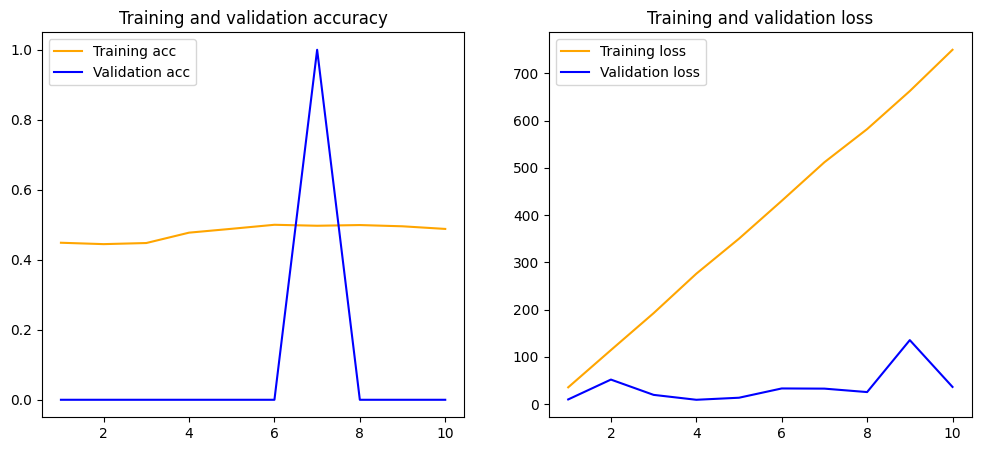

In [55]:
# Plot the training and validation accuracy and loss
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training acc', color='orange')
    plt.plot(epochs, val_acc, label='Validation acc', color='blue')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training loss', color='orange')
    plt.plot(epochs, val_loss, label='Validation loss', color='blue')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

plot_history(history_inception)

In [56]:
# Predict the classes for the test set
y_test_pred = model_inception.predict(test_generator)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Get the true labels
y_test_true = test_generator.classes

# Calculate confusion matrix and classification report
conf_matrix_test = confusion_matrix(y_test_true, y_test_pred_classes)
class_report_test = classification_report(y_test_true, y_test_pred_classes)

print("Confusion Matrix (Test):\n", conf_matrix_test)
print("\nClassification Report (Test):\n", class_report_test)

32/32 [==============================] - 20s 584ms/step
Confusion Matrix (Test):
 [[   0 1005]
 [   0    0]]

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00    1005.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00    1005.0
   macro avg       0.00      0.00      0.00    1005.0
weighted avg       0.00      0.00      0.00    1005.0



C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\

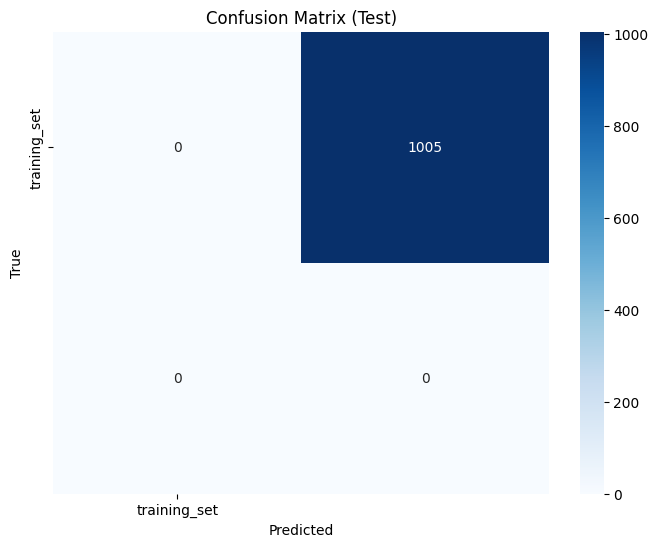

In [57]:
# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (Test)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Mobilenet

In [58]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import MobileNetV2
from keras import layers
from keras import models
from keras import optimizers
from keras.callbacks import ModelCheckpoint
import seaborn as sns

In [59]:
# Constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 2  # Change this to the number of classes in your dataset

In [60]:
# Paths
train_path = 'C:/Users/Ramesh/Downloads/set/training_set/'
test_path = 'C:/Users/Ramesh/Downloads/set/test_set/'

In [61]:
# Use ImageDataGenerator for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # Use 'categorical' for multiclass classification
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 2564 images belonging to 1 classes.
Found 641 images belonging to 1 classes.


In [62]:
# Get the class names from the subdirectories
class_names = sorted(train_generator.class_indices.keys())

# Print the class names
print("Class Names:", class_names)

Class Names: ['training_set']


In [63]:
# Use ImageDataGenerator for testing
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 1005 images belonging to 1 classes.


In [64]:
# Create the MobileNetV2 model
base_model_mobilenetv2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model_mobilenetv2 = models.Sequential()
model_mobilenetv2.add(base_model_mobilenetv2)
model_mobilenetv2.add(layers.GlobalAveragePooling2D())
model_mobilenetv2.add(layers.Dense(256, activation='relu'))
model_mobilenetv2.add(layers.Dropout(0.5))
model_mobilenetv2.add(layers.Dense(NUM_CLASSES, activation='softmax'))

9406464/9406464 [==============================] - 2s 0us/step


In [65]:
# Freeze the pre-trained layers
for layer in base_model_mobilenetv2.layers:
    layer.trainable = False

In [66]:
model_mobilenetv2.compile(optimizer=optimizers.RMSprop(lr=1e-4),
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

In [67]:
# Print the model summary
model_mobilenetv2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_6 (Dense)             (None, 256)               327936    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 2)                 514       
                                                                 
Total params: 2586434 (9.87 MB)
Trainable params: 3284

In [68]:
# Define callbacks (ModelCheckpoint)
checkpoint = ModelCheckpoint('best_model_mobilenetv2.h5', monitor='val_accuracy', save_best_only=True)

Epoch 1/10
80/80 [==============================] - ETA: 0s - loss: 18.6737 - accuracy: 0.4510

C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


80/80 [==============================] - 57s 688ms/step - loss: 18.6737 - accuracy: 0.4510 - val_loss: 9.8780 - val_accuracy: 0.0000e+00
Epoch 2/10
80/80 [==============================] - 53s 668ms/step - loss: 58.8237 - accuracy: 0.4309 - val_loss: 18.8782 - val_accuracy: 0.0000e+00
Epoch 3/10
80/80 [==============================] - 53s 666ms/step - loss: 101.9416 - accuracy: 0.4412 - val_loss: 30.5468 - val_accuracy: 0.0000e+00
Epoch 4/10
80/80 [==============================] - 54s 671ms/step - loss: 144.5695 - accuracy: 0.4648 - val_loss: 2.9574 - val_accuracy: 0.0203
Epoch 5/10
80/80 [==============================] - 53s 666ms/step - loss: 183.0388 - accuracy: 0.4842 - val_loss: 6.0233 - val_accuracy: 0.0000e+00
Epoch 6/10
80/80 [==============================] - 54s 669ms/step - loss: 225.6485 - accuracy: 0.4897 - val_loss: 22.3115 - val_accuracy: 1.0000
Epoch 7/10
80/80 [==============================] - 54s 675ms/step - loss: 274.8389 - accuracy: 0.5016 - val_loss: 5.1182 - 

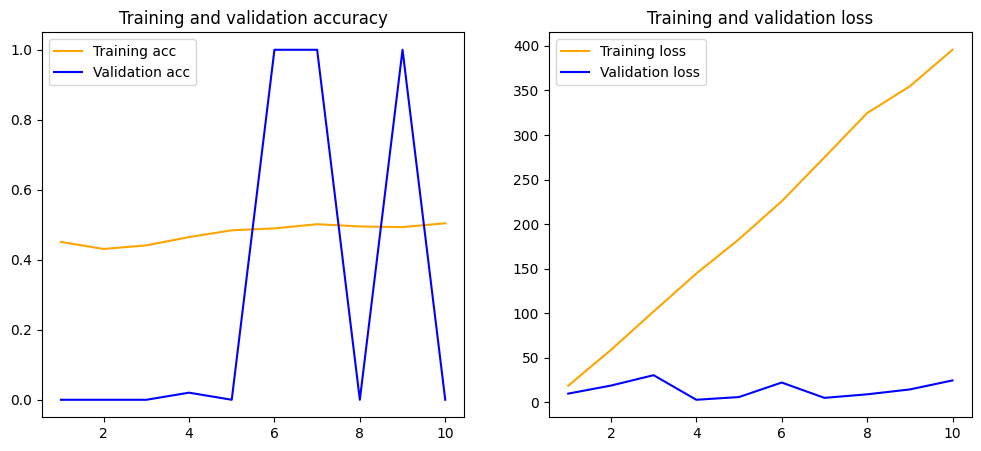

In [69]:
# Train the model
history_mobilenetv2 = model_mobilenetv2.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    callbacks=[checkpoint]
)
# Plot the training and validation accuracy and loss
plot_history(history_mobilenetv2)

In [70]:
# Evaluate on the test set
test_loss, test_acc = model_mobilenetv2.evaluate(test_generator)
print(f'Test Accuracy: {test_acc * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')

32/32 [==============================] - 9s 282ms/step - loss: 22.3639 - accuracy: 0.0000e+00
Test Accuracy: 0.00%
Test Loss: 22.3639


In [71]:
# Predict the classes for the test set
y_test_pred = model_mobilenetv2.predict(test_generator)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Get the true labels
y_test_true = test_generator.classes

# Calculate confusion matrix and classification report
conf_matrix_test = confusion_matrix(y_test_true, y_test_pred_classes)
class_report_test = classification_report(y_test_true, y_test_pred_classes)

print("Confusion Matrix (Test):\n", conf_matrix_test)
print("\nClassification Report (Test):\n", class_report_test)

32/32 [==============================] - 10s 281ms/step
Confusion Matrix (Test):
 [[   0 1005]
 [   0    0]]

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00    1005.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00    1005.0
   macro avg       0.00      0.00      0.00    1005.0
weighted avg       0.00      0.00      0.00    1005.0



C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\

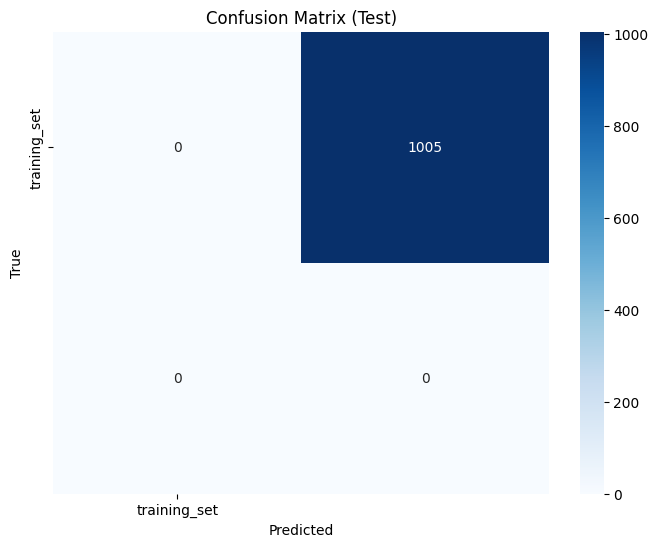

In [72]:
# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (Test)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()